In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from MCMC_VMP import MCMC_VMP
from UGMM_Simples import UGMM_Simples

In [13]:
np.random.seed(0)

In [14]:
N, K = 1000, 5

print(f'Número dos observações: {N}\n')

print(f'Número das categorias latentes: {K}')

Número dos observações: 1000

Número das categorias latentes: 5


In [15]:
sigma = 1

mu = np.linspace(start = -sigma*K, stop = sigma*K, num = K)

print(f'Desvio padrão dos dados: {sigma}\n')

print(f'Média das categorias latentes:\n')

print(mu)

Desvio padrão dos dados: 1

Média das categorias latentes:

[-5.  -2.5  0.   2.5  5. ]


In [16]:
Z = np.random.multinomial(n = N, pvals = [1/K]*K)

print('Número de observações por categoria: \n')

print(Z)

Número de observações por categoria: 

[204 209 197 191 199]


In [17]:
Dados = {'X': [], 'Z': []}

for k in range(K):

    Dados['X'] += list(np.random.normal(loc = mu[k], scale = sigma, size = Z[k]))

    Dados['Z'] += [k]*Z[k]

Dados = pd.DataFrame(Dados)

Dados.head()

,X,Z
0,-5.103219,0
1,-4.589401,0
2,-4.855956,0
3,-3.545726,0
4,-4.238962,0


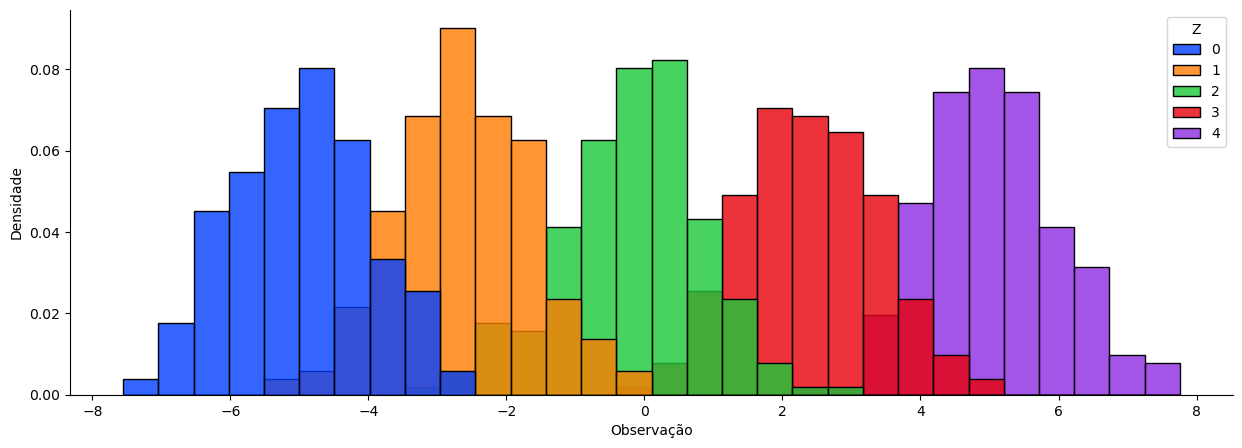

In [18]:
plt.figure(figsize = (15, 5))

Grafico = sns.histplot(

    data = Dados, x = 'X', hue = 'Z', 
    
    stat = 'density', bins = 30, 
    
    palette = 'bright', alpha = 0.8

)

Grafico.spines['right'].set_visible(False)

Grafico.spines['top'].set_visible(False)

plt.xlabel('Observação')

plt.ylabel('Densidade')

plt.show()

In [22]:
Modelo = MCMC_VMP(

    Dados = np.array(Dados['X']).reshape((-1, 1)), Categorias = K, 
    
    nu_0 = 1e-6, chi_0 = np.array([0]), 
    
    Distribuicao = UGMM_Simples(sigma = sigma),

    Amostra = 10, Descartadas = 20

)

Modelo.estima_modelo(num = 50)

In [23]:
print(Modelo.eta*sigma)

[[ 2.48918621]
 [-4.08558063]
 [ 5.02373999]
 [-2.51747176]
 [ 0.10064187]]
